# Support Vector Machine (SVM)

 
A support vector machine is a machine learning model that is able to generalise between two different classes if the set of labelled data is provided in the training set to the algorithm. The main function of the SVM is to check for that hyperplane that is able to distinguish between the two classes.

 
There can be many hyperplanes that can do this task but the objective is to find that hyperplane that has the highest margin that means maximum distances between the two classes, so that in future if a new data point comes that is two be classified then it can be classified easily. 

## How Does Svm Works?

### 1. Linearly Separable Data


Let us understand the working of SVM by taking an example where we have two classes that are shown is the below image which are a class A: Circle & class B: Triangle. Now, we want to apply the SVM algorithm and find out the best hyperplane that divides the both classes.

![SVM1](../data/SVM1.png)

![SVM2](../data/SVM2.png)


SVM takes all the data points in consideration and gives out a line that is called ‘Hyperplane’ which divides both the classes. This line is termed as ‘Decision boundary’. Anything that falls in circle class will belong to the  class A and vice-versa.

![SVM3](../data/SVM3.png)


There can be many hyperplanes that you can see but the best hyper plane that divides the two classes would be the hyperplane having a large distance from the hyperplane from both the classes. That is the main motive of SVM to find such best hyperplanes.

There can be different dimensions which solely depends upon the features we have. It is tough to visualize when the features are more than 3.

![SVM4](../data/SVM4.png)


Consider we have two classes that are red and yellow class A and B respectively. We need to find the best hyperplane between them that divides the two classes. 

![SVM5](../data/SVM5.png)


Soft margin permits few of the above data points to get misclassified. Also,it tries to make the balance back and forth between finding a hyperplane that attempts to make less misclassifications and maximize the margin.

### 2. Linearly Non-separable Data

![SVM6](../data/SVM6.png)


If the data is non linearly separable as shown in the above figure then SVM makes use of kernel tricks to make it linearly separable. The concept of transformation of non-linearly separable data into linearly separable is called Cover’s theorem - “given a set of training data that is not linearly separable, with high probability it can be transformed into a linearly separable training set by projecting it into a higher-dimensional space via some non-linear transformation”. Kernel tricks help in projecting data points to the higher dimensional space by which they became relatively more easily separable in higher-dimensional space.



### Kernel Tricks: 

![SVM7](../data/SVM7.png)


Kernel tricks also known as Generalized dot product. Kernel tricks are the way of calculating dot product of two vectors to check how much they make an effect on each other. According to Cover’s theorem the chances of linearly non-separable data sets becoming linearly separable increase in higher dimensions. Kernel functions are used to get the dot products to solve SVM constrained optimization.


### SVM Kernel Functions:
 
While using the svm classifier we can take the kernel as ‘linear’ , ’poly’ , ‘rbf’ , ‘sigmoid’. Let us see which are the most used kernels that are polynomial and rbf (Radial Basis Function). You can refer here for documentation that is present on sklearn.


- Polynomial Kernel-  The process of generating  new features by using a polynomial combination of all the existing features.


- Radial Basis Function(RBF) Kernel-  The process of generating new features calculating the distance between all other dots to a specific dot. One of the rbf kernels that is used widely is the Gaussian Radial Basis function.

### Degree of tolerance in SVM 
 

The penalty term that is passed as a hyper parameter in SVM while dealing with both linearly separable and non linear solutions is denoted as ‘C’ that is called as Degree of tolerance. Large value of C results in the more penalty SVM gets when it makes a misclassification. The decision boundary will be dependent on narrow margin and less support vectors.

 
### Pros of SVM

-    High stability due to dependency on support vectors and not the data points.

-    Does not get influenced by Outliers. 

-    No assumptions made of the datasets.

-    Numeric predictions problem can be dealt with SVM.


### Cons of SVM

 

- Blackbox method.

- Inclined to overfitting method.

- Very rigorous computation.

## Example:

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os

**DATA PREPROCESSING**

In [12]:
df = pd.read_csv('data/05/mobileprice/train.csv')
test = pd.read_csv('data/05/mobileprice/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
# checking if there is any missing value
df.isnull().sum().max()

0

In [14]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**TARGET VALUE ANALYSIS**

In [15]:
#understanding the predicted value - which is hot encoded, in real life price won't be hot encoded.
df['price_range'].describe(), df['price_range'].unique()

# there are 4 classes in the predicted value

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0]))

<AxesSubplot:>

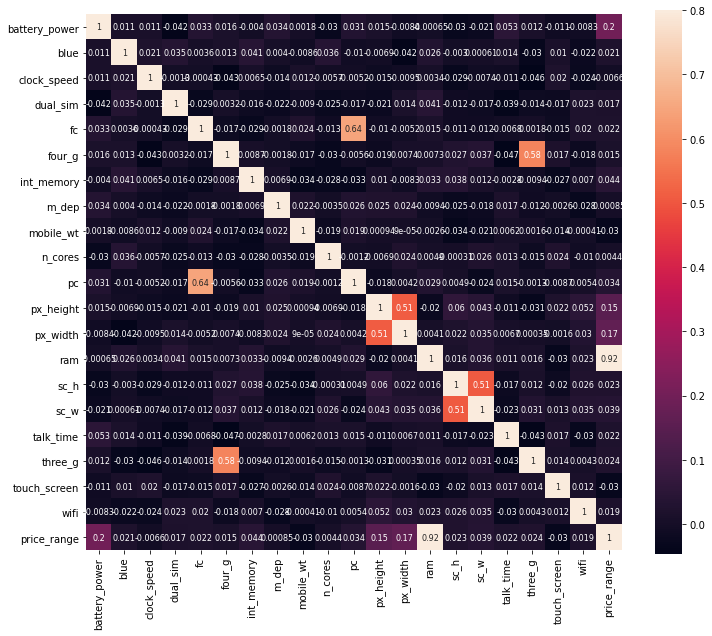

In [16]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

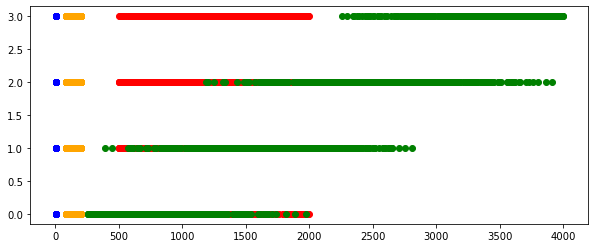

In [17]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='orange')
# clearly we can see that each of the category has different set of value ranges 

Now in the data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data 

**SUPPORT VECTOR MACHINES AND METHODS : **

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [22]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [23]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [24]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.25
Test Stratergy :stratified 
 Score :0.23
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.24
Test Stratergy :uniform 
 Score :0.22


In [25]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [26]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

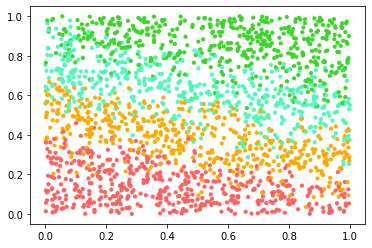

In [27]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

<ipython-input-28-7318cbc697ae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
<ipython-input-28-7318cbc697ae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


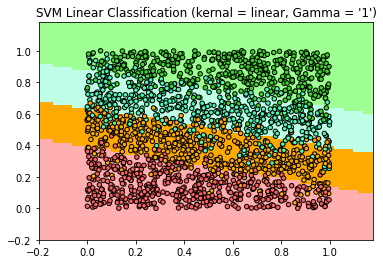

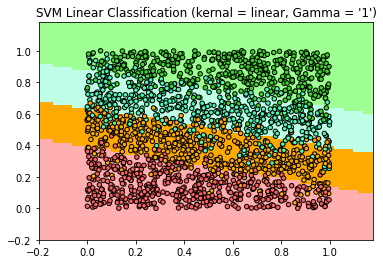

In [28]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [29]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [30]:
# Linear Support vector machine with only C Parameter 
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))



Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:5, training score :0.868125 , Test Score: 0.870000 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:10, training score :0.871875 , Test Score: 0.872500 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:40, training score :0.855625 , Test Score: 0.842500 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:60, training score :0.820625 , Test Score: 0.830000 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:80, training score :0.803750 , Test Score: 0.795000 

Linear SVM value of C:100, training score :0.773750 , Test Score: 0.762500 



/home/kissami/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Apparently we got better scores with SVC where we defined the kernal as linear than with just LinearSVC

The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs.
1. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n).

The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick.
1. The training time complexity is usually between O(m2 × n) and O(m3 × n). 
1. LinearSVC is much faster than SVC(kernel="linear")


In [31]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


* SVM supports linear and nonlinear regression.
* SVM Regression tries to fit as many instances as possible on the decision boundary while limiting margin violations.
* The width of the decision boundary is controlled by a hyperparameter ϵ. 


**NON LINEAR SVM**

A method to Handle Non linear relationships in our data set is to use polynomial Kernal or using a similarity function with our SVM.

We will use the Gaussian Radial Basis Function(RBF) function for the same. to handle this in Sklearn there is a Gamma hyperparameter. 
Check the Gausian RBF Function - for more info. 

Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. **In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other.**

Initution : we create different landmarks and then check how far the training examples are from the landmark. In practise, if we have n training examples then we will have n landmarks and we will thus create a feature set of n values with n landmarks. When the training example is closest to a landmark the value the variance will be small and when far the value will be large and hence we will associate the close to the landmark example with a 1 and those that are far with a 0. This ability makes the SVM very powerful. 

In [32]:
# SMV with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.969375 Test Score : 0.862500

SVM for Non Linear 
 C:5 Training Score : 0.998750 Test Score : 0.872500

SVM for Non Linear 
 C:10 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:25 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:50 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:100 Training Score : 1.000000 Test Score : 0.877500



<ipython-input-33-36c3478154ca>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
<ipython-input-33-36c3478154ca>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


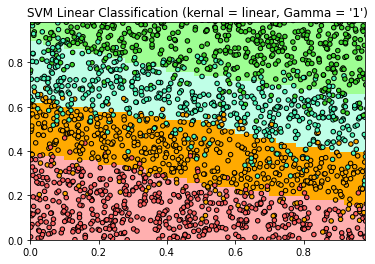

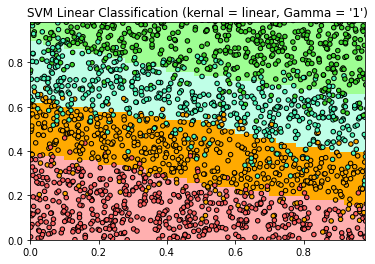

In [33]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='rbf',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [34]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [35]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [36]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]})

In [37]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.90.


In [38]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

1.00 is the accuracy of the SV Regressor


We can notice that the kernalised Support vector machine regressor gives better accuracy than the previous Linear Regressor(non kernal) SVM. Never the less one, needs to understand the data one is work on before trying out various methods. Cross validation techniques are useful.

I may futher add Cross Validation techniques for your use.

In [39]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [40]:
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)

In [41]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,2
1,2
2,2
3,2
4,2


In [42]:
prediction = svr2.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,1.443312
1,1.443312
2,1.443312
3,1.443312
4,1.443312


We have predicted the value of the test set that was provided to us in the data set and we can from the previous 2 blocks that our predictions are pretty accurate. Looks Good. !! Enjoy !! 
Post your comments for Discussio